In [1]:
import calliope
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# example of iterating programmatically through a range of values for a parameter
# in this case we re-run the model with different grid bean costs
# and see how this affects the amount of bean produced locally and their cost in each case
grid_bean_costs = np.arange(0, 200, 20) # range of values to try for the cost of grid beans [0,10,20...100]

# create a list to hold results
bean_results = []

# set up initial model as usual
#model = calliope.Model('model.yaml')

# iterate through each value
for grid_bean_cost in grid_bean_costs:
    # instantiate model with appropriate over-ride
    # index the parameter to be over-ridden by its location in the model hierarchy
    model = calliope.Model('model.yaml',
                           override_dict = {'locations.region1.techs.magic_bean_grid.costs.monetary.om_con': grid_bean_cost})

    model.run(force_rerun=True) # rerun model
    bean_results.append({'grid_bean_cost' : grid_bean_cost,
                         'local_bean_prod' : model.results.carrier_prod.sel(loc_tech_carriers_prod='region1::magic_bean_maker::magic_beans').values.sum(),
                         'local_bean_cost' : model.results.cost.sel(costs='monetary', loc_techs_cost='region1::magic_bean_maker').values
                         }) # store results in list

# convert results into pandas dataframe for easier plotting/manipulation
# see https://pandas.pydata.org/docs/user_guide/index.html#user-guide
bean_results_df = pd.DataFrame(bean_results)

# calculate new column as average cost of a locally-produced bean
bean_results_df['average_bean_cost'] = bean_results_df.local_bean_cost / bean_results_df.local_bean_prod

# show table of results
bean_results_df

,grid_bean_cost,local_bean_prod,local_bean_cost,average_bean_cost
0,0,0.00000,0.0,NaN
1,20,0.00000,0.0,NaN
2,40,0.00000,0.0,NaN
3,60,336667.43961,16833371.980500016,50
4,80,336667.43961,16833371.980500016,50
5,100,336667.43961,16833371.980500016,50
6,120,336667.43961,16833371.980500016,50
7,140,336667.43961,16833371.980500016,50
8,160,336667.43961,16833371.980500016,50
9,180,336667.43961,16833371.980500016,50


<AxesSubplot:label='bb8d5f17-6c1c-4001-bb40-2f4c33a30073'>

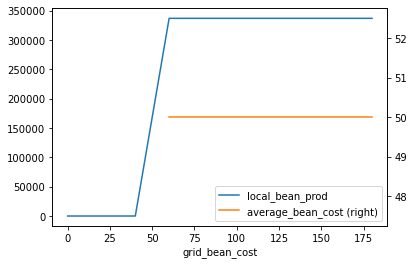

In [3]:
# plot results
# see https://pandas.pydata.org/docs/user_guide/visualization.html
# and https://matplotlib.org/stable/index.html
ax = bean_results_df.plot('grid_bean_cost',
                          'local_bean_prod')
bean_results_df.plot('grid_bean_cost',
                     'average_bean_cost',
                     secondary_y=True,
                     ax=ax)

In [4]:
# the output of the model is an xarray, see http://xarray.pydata.org/en/stable/
# this function allows us to see all the output Data Variables and the Coordinates to reference them
# and then we use the sel() function as above to fetch the values we are interested in

model.results


<xarray.Dataset>
Dimensions:                     (carriers: 2, costs: 1, loc_tech_carriers_con: 3, loc_tech_carriers_prod: 4, loc_techs: 6, loc_techs_cost: 4, loc_techs_investment_cost: 3, loc_techs_om_cost: 4, techs: 6, timesteps: 744)
Coordinates:
  * loc_tech_carriers_con       (loc_tech_carriers_con) object 'region1::dema...
  * loc_tech_carriers_prod      (loc_tech_carriers_prod) object 'region1::win...
  * loc_techs                   (loc_techs) object 'region1::demand_magic_bea...
  * loc_techs_cost              (loc_techs_cost) object 'region1::magic_bean_...
  * loc_techs_investment_cost   (loc_techs_investment_cost) object 'region1::...
  * loc_techs_om_cost           (loc_techs_om_cost) object 'region1::magic_be...
  * techs                       (techs) object 'wind_farm' ... 'magic_bean_grid'
  * carriers                    (carriers) object 'magic_beans' 'power'
  * costs                       (costs) object 'monetary'
  * timesteps                   (timesteps) datetime64[ns] 2020-01-01 ... 202...
Data variables:
    energy_cap                  (loc_techs) float64 1e+03 1e+03 ... 1e+03 2e+03
    carrier_prod                (loc_tech_carriers_prod, timesteps) float64 2...
    carrier_con                 (loc_tech_carriers_con, timesteps) float64 -1...
    cost                        (costs, loc_techs_cost) float64 1.683e+07 ......
    cost_var                    (costs, loc_techs_om_cost, timesteps) float64 ...
    cost_investment             (costs, loc_techs_investment_cost) float64 0....
    capacity_factor             (timesteps, loc_tech_carriers_prod) float64 1...
    systemwide_capacity_factor  (carriers, techs) float64 0.0 0.4525 ... nan 0.0
    systemwide_levelised_cost   (carriers, costs, techs) float64 nan ... inf
    total_levelised_cost        (carriers, costs) float64 121.2 83.45
Attributes:
    calliope_version:          0.6.6-post1
    applied_overrides:         
    scenario:                  None
    defaults:                  available_area: null\ncarrier_ratios: false\nc...
    allow_operate_mode:        1
    model_config:              calliope_version: 0.6.6\nname: Missing Bean Pr...
    run_config:                backend: pyomo\nbigM: 1000000.0\ncyclic_storag...
    termination_condition:     optimal
    objective_function_value:  90180856.22649059
    solution_time:             2.52506
    time_finished:             2021-02-22 02:05:27